In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats #Nowa biblioteka do statystyk
print("Biblioteki statystyczne zaimportowane.")

Biblioteki statystyczne zaimportowane.


In [5]:
dochody = np.array([5,6,7,5,8,9,6,10,15,7,6,50])
print(f"Średnia: {np.mean(dochody)}")

Średnia: 11.166666666666666


Średni dochód pracownika firmy wynosi ~11.16. Wartość zafałszowana przez pensję osób zarabiających dużo więcej niż pozostali (wartość: 50 i 15)

In [6]:
print(f"Mediana: {np.median(dochody)}")

Mediana: 7.0


Po uszeregowaniu wartości od najmniejszej do największej środowka z nich wynosi 7, co stanowi mediane.

In [7]:
df = pd.Series(dochody)
moda_df = df.mode()
print(f"Moda: {moda_df.values}")

Moda: [6]


Najwięcej osób wśród pracowników zarabia 6 tys. - tyle wynosi moda.

In [25]:
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
zakres = np.max(czas_reakcji) - np.min(czas_reakcji)
print(f"Zakres czasu reakcji: {zakres}")

Zakres czasu reakcji: 55


Zakres czasu reakcji obliczany jako różnica między wartościami skrajnymi (maksymalną i minimalną).

In [26]:
#Wariancja obliczona w NumPy
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
wariancja_np = np.var(czas_reakcji, ddof=1) #ddof=1 to wartość przy obliczaniu wyniku dla próby (jest to wartość domyślna), ddof=0 wykorzystujemy gdy statystyka jest obliczana dla populacji
print(f"Wariancja (Obliczona w NumPy dla próby): {wariancja_np}")

Wariancja (Obliczona w NumPy dla próby): 231.95555555555555


Wariancja obliczana na podstawie próby z pomiaru reakcji czasu graczy. Kalkulacje wykonano odejmując od każdej z wartości umieszczonej w tablicy średnią (xi−x)[xi - każda wartość w tablicy odejmowana w kolejnych iteracjach, x - wartość średniej], następnie wartość każdego z odchyleń podniesiono do kwadratu ((xi-x)^2), na koniec sumowano wszystkie wartości podniesione do kwadratu i podzielono przez liczbę prób - 1

In [27]:
#Ta sama wariancja obliczona w Pandas
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
df_czas = pd.DataFrame({'czas_reakcji': czas_reakcji})
wariancja_pd = df_czas['czas_reakcji'].var()
print(f"Wariancja (Obliczona w Pandas dla próby):  {wariancja_pd}")

Wariancja (Obliczona w Pandas dla próby):  231.95555555555555


In [28]:
#Odchylenie standardowe w NumPy
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
odchylenie_np = np.std(czas_reakcji, ddof=1) #ddof=1 to standard dla próby (domyślna wartość), ddof=0 wartość dla populacji
print(f"Odchylenie standarowe dla próby: {odchylenie_np}")

Odchylenie standarowe dla próby: 15.230087181482434


In [ ]:
Pierwiastek kwadratowy z wariancji. 

In [29]:
#Odchylenie standardowe w Pandas
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
df_odchylenie = pd.DataFrame({'czas_reakcji': czas_reakcji})
odchylenie_pd = df_odchylenie['czas_reakcji'].std()
print(f"Odchylenie standardowe dla próby: {odchylenie_pd}")

Odchylenie standardowe dla próby: 15.230087181482434


In [30]:
#Obliczenie kwartyli i rozstępu międzykwartylowego z użyciem Numpy (IQR - Interqurtile Range)

czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
Q1_np = np.percentile(czas_reakcji, 25)
Q3_np = np.percentile(czas_reakcji, 75)
IQR_np = Q3_np - Q1_np
print(f"Q1: {Q1_np}")
print(f"Q3: {Q3_np}")
print(f"IQR: {IQR_np}")


Q1: 155.75
Q3: 168.75
IQR: 13.0


Kwartyle dzielą zbiór na 4 równe części. Obliczenie wykorzystuje 25 i 75 percentyl obliczając różnice z nich. Pozwala to na wyeliminowanie wpływu wartości skrajnych z rozproszenia.

In [33]:
#Obliczenie kwartyli i rozstępu międzykwartylowego z użyciem Pandas (IQR - Interqurtile Range)

czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])
df_czas = pd.DataFrame({'czas_reakcji': czas_reakcji})
opis_danych = df_czas.describe()
print(f"\nOpis danych:")
print(opis_danych)

Q1_pd = opis_danych.loc['25%', 'czas_reakcji']
Q3_pd = opis_danych.loc['75%', 'czas_reakcji']
IQR_pd = Q3_pd - Q1_pd
print(f"Q1: {Q1_pd}")
print(f"Q3: {Q3_pd}")
print(f"IQR: {IQR_pd}")


Opis danych:
       czas_reakcji
count     10.000000
mean     163.800000
std       15.230087
min      145.000000
25%      155.750000
50%      161.500000
75%      168.750000
max      200.000000
Q1: 155.75
Q3: 168.75
IQR: 13.0


In [35]:
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])

skosnosc = skew(czas_reakcji)
kurtoza = kurtosis(czas_reakcji)
print(f"Czas reakcji - Skośność: {skosnosc}, Kurtoza: {kurtoza}")

Czas reakcji - Skośność: 1.2606489858171515, Kurtoza: 1.3408596921039688


Skośność dodatnia (> 0) - rozkład skośny prawostronnie (ogon rozciągnięty w prawo), średnia > mediana > moda
Kurtoza > 0 (Leptokurtyczna) - ogony grubsze, niż w rozkładzie normalnym. Znaczna liczba wartości odstających.

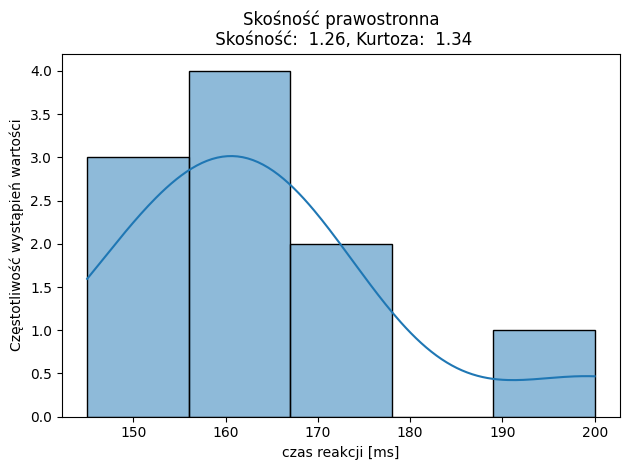

In [42]:
czas_reakcji = np.array([150, 160, 155, 170, 145, 200, 165, 158, 172, 163])

sns.histplot(czas_reakcji, kde=True)
plt.title(f"Skośność prawostronna\n Skośność: {skosnosc: .2f}, Kurtoza: {kurtoza: .2f}")
plt.xlabel("czas reakcji [ms]")
plt.ylabel("Częstotliwość wystąpień wartości")
plt.tight_layout()
plt.show()

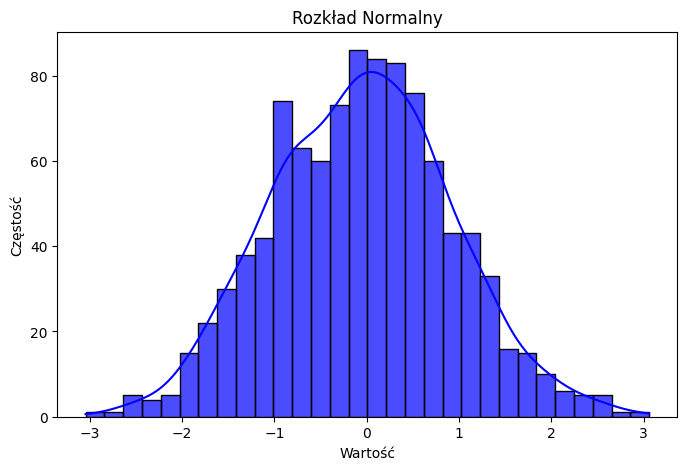

Gęstość prawdopodobieństwa dla x=0 w standardowym rozkładzie normalnym: 0.399
Gęstość prawdopodobieństwa dla x=1 w standardowym rozkładzie normalnym: 0.242


In [54]:
# Generowanie danych z rozkładu normalnego
# loc = średnia, scale = odchylenie standardowe, size = liczba próbek
dane_normalne = np.random.normal(loc=0, scale=1, size=1000) # Standardowy rozkład normalny (średnia 0, odch. std 1)

# Wizualizacja histogramu
plt.figure(figsize=(8, 5))
sns.histplot(dane_normalne, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Rozkład Normalny')
plt.xlabel('Wartość')
plt.ylabel('Częstość')
plt.show()

# Prawdopodobieństwo (funkcja gęstości prawdopodobieństwa - PDF)
# Zobaczymy, jak SciPy pozwala obliczyć PDF w dowolnym punkcie
x_wartosc = 0
pdf_wartosc = stats.norm.pdf(x_wartosc, loc=0, scale=1)
print(f"Gęstość prawdopodobieństwa dla x=0 w standardowym rozkładzie normalnym: {pdf_wartosc:.3f}")

x_wartosc = 1
pdf_wartosc_1 = stats.norm.pdf(x_wartosc, loc=0, scale=1)
print(f"Gęstość prawdopodobieństwa dla x=1 w standardowym rozkładzie normalnym: {pdf_wartosc_1:.3f}")

Kurtoza wynosi: 0.09152007187478794
Skośność jest równa: -0.011756886809160032


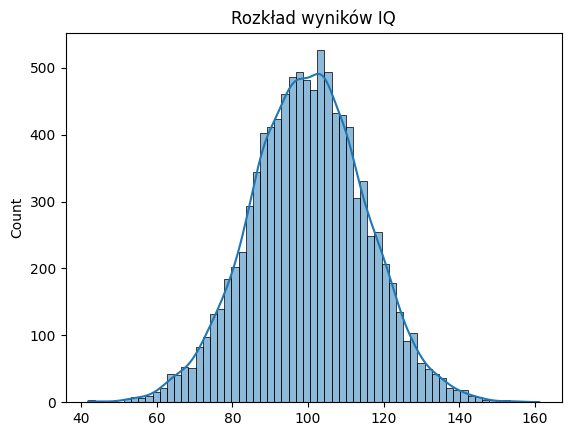

In [46]:
# Generowanie danych z rozkładu normalnego
# loc = średnia, scale = odchylenie standardowe, size = liczba próbek

rozklad_normalny = np.random.normal(loc=100, scale=15, size=10000)
sns.histplot(rozklad_normalny, kde=True)
plt.title("Rozkład wyników IQ")
skosnosc = skew(rozklad_normalny)
kurtoza = kurtosis(rozklad_normalny)
print(f"Kurtoza wynosi: {kurtoza}\nSkośność jest równa: {skosnosc}")


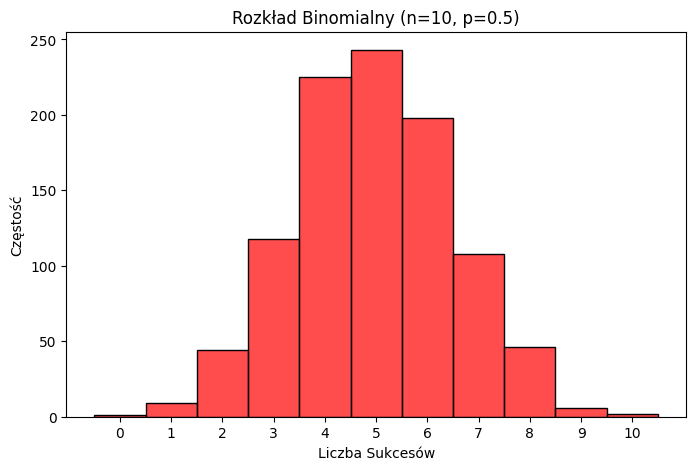

Prawdopodobieństwo 5 sukcesów w 10 próbach (p=0.5): 0.246


In [55]:
# Generowanie danych z rozkładu binomialnego
# np. liczba sukcesów w 10 próbach, gdzie p = 0.5 (szansa na sukces w każdej próbie)
n_prob = 10 # liczba rzutów monetą
p_sukces = 0.5 # prawdopodobieństwo wypadnięcia orła
dane_binomialne = np.random.binomial(n=n_prob, p=p_sukces, size=1000)

# Wizualizacja histogramu (dla dyskretnych danych częściej używa się barplot lub histplot z odpowiednimi bins)
plt.figure(figsize=(8, 5))
sns.histplot(dane_binomialne, bins=np.arange(n_prob + 2) - 0.5, stat='count', color='red', alpha=0.7)
# bins: -0.5, 0.5, 1.5... żeby słupki były centrowane na wartościach całkowitych
# stat='count' (domyślny dla histplot) lub 'probability'
plt.title(f'Rozkład Binomialny (n={n_prob}, p={p_sukces})')
plt.xlabel('Liczba Sukcesów')
plt.ylabel('Częstość')
plt.xticks(np.arange(n_prob + 1)) # Ustawienie etykiet dla liczb całkowitych
plt.show()

# Prawdopodobieństwo (funkcja masy prawdopodobieństwa - PMF)
# Prawdopodobieństwo uzyskania 5 sukcesów w 10 próbach z p=0.5
pmf_binomialny = stats.binom.pmf(k=5, n=n_prob, p=p_sukces) # k = liczba sukcesów
print(f"Prawdopodobieństwo 5 sukcesów w 10 próbach (p=0.5): {pmf_binomialny:.3f}")

   moda
0    10


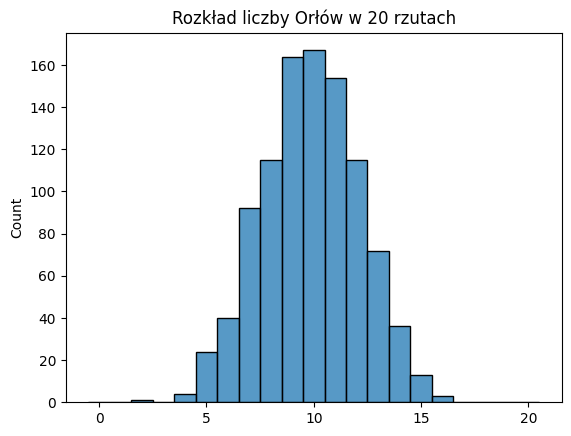

In [53]:
# Generowanie danych z rozkładu binomialnego
# Liczba sukcesów w 20 próbach, gdzie p = 0.5 (szansa na sukces w każdej próbie)

n_prob = 20 #liczba rzutów monetą
p_sukces = 0.5 #prawdopodobieństwo wypadnięcia orła

dane_binomialne = np.random.binomial(n=n_prob, p=p_sukces, size=1000)
sns.histplot(dane_binomialne, bins=np.arange(n_prob+2)-0.5, stat='count')
plt.title("Rozkład liczby Orłów w 20 rzutach")
df = pd.DataFrame({'moda':dane_binomialne})
print(df.mode())

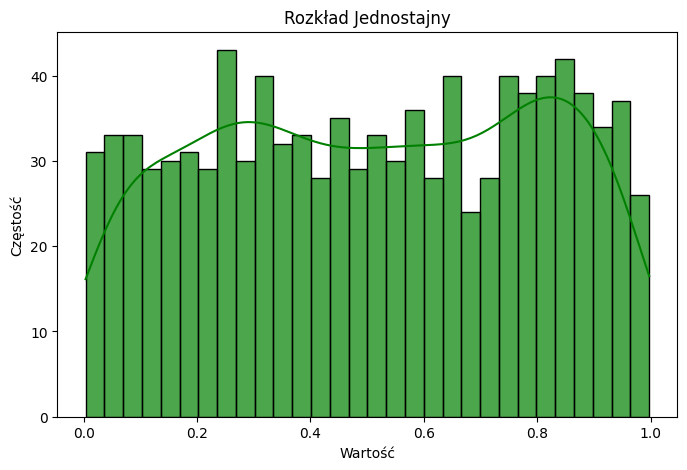

Gęstość prawdopodobieństwa dla x=0.5 w rozkładzie jednostajnym (0,1): 1.000


In [57]:
# Generowanie danych z rozkładu jednostajnego (od 0 do 1)
dane_jednostajne = np.random.uniform(low=0, high=1, size=1000)

# Wizualizacja histogramu
plt.figure(figsize=(8, 5))
sns.histplot(dane_jednostajne, kde=True, bins=30, color='green', alpha=0.7)
plt.title('Rozkład Jednostajny')
plt.xlabel('Wartość')
plt.ylabel('Częstość')
plt.show()

# PDF dla rozkładu jednostajnego
# Prawdopodobieństwo w dowolnym punkcie w przedziale jest stałe
pdf_jednostajny = stats.uniform.pdf(0.5, loc=0, scale=1) # loc=a, scale=(b-a)
print(f"Gęstość prawdopodobieństwa dla x=0.5 w rozkładzie jednostajnym (0,1): {pdf_jednostajny:.3f}")

Skośność populacji wykładniczej: 1.97
Skośność rozkładu średnich: 0.36


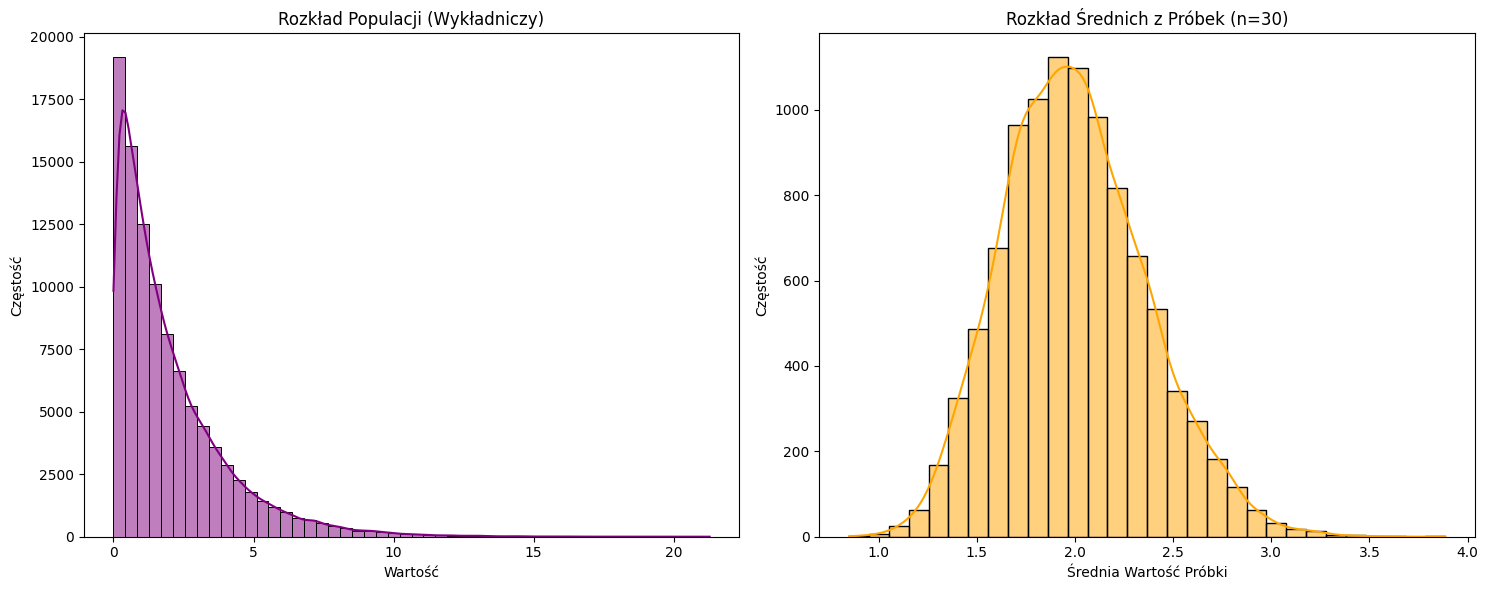

In [58]:
# 1. Definiujemy populację o NIE-normalnym rozkładzie (np. rozkład wykładniczy)
# Rozkład wykładniczy jest silnie skośny prawostronnie
dane_populacji_wykladniczej = np.random.exponential(scale=2, size=100000)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(dane_populacji_wykladniczej, kde=True, bins=50, color='purple')
plt.title('Rozkład Populacji (Wykładniczy)')
plt.xlabel('Wartość')
plt.ylabel('Częstość')
print(f"Skośność populacji wykładniczej: {skew(dane_populacji_wykladniczej):.2f}")


# 2. Bierzemy wiele próbek z tej populacji i obliczamy średnią dla każdej próbki
liczba_prob = 10000       # Ile średnich będziemy obliczać
rozmiar_proby = 30      # Rozmiar każdej próbki (n >= 30, aby zadziałało CTG)

srednie_probek = []
for _ in range(liczba_prob):
    proba = np.random.choice(dane_populacji_wykladniczej, size=rozmiar_proby)
    srednie_probek.append(np.mean(proba))

srednie_probek = np.array(srednie_probek)

# 3. Wizualizujemy rozkład średnich z próbek
plt.subplot(1, 2, 2)
sns.histplot(srednie_probek, kde=True, bins=30, color='orange')
plt.title(f'Rozkład Średnich z Próbek (n={rozmiar_proby})')
plt.xlabel('Średnia Wartość Próbki')
plt.ylabel('Częstość')
print(f"Skośność rozkładu średnich: {skew(srednie_probek):.2f}")

plt.tight_layout()
plt.show()

# Zauważ, że histogram średnich z próbek jest już znacznie bardziej zbliżony do rozkładu normalnego,
# mimo że populacja macierzysta miała rozkład wykładniczy.

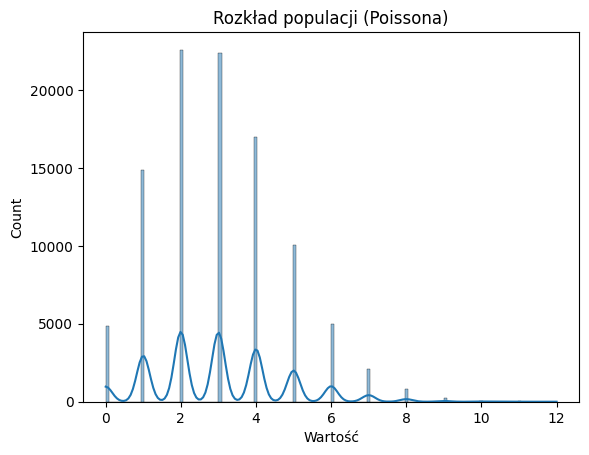

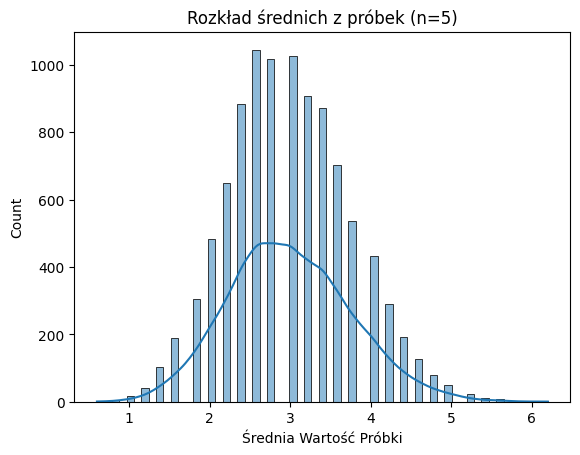

0.5661995856522416
0.2631329444787344


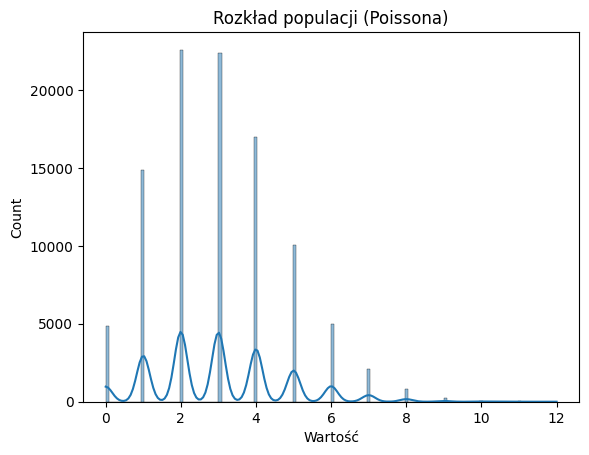

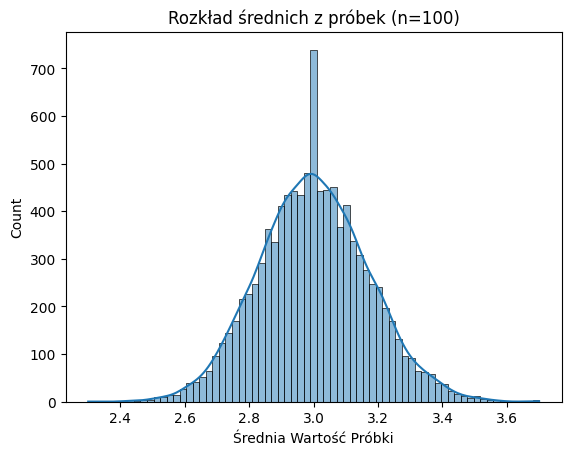

0.5661995856522416
0.08830829876705502


In [72]:
#zdefiniowanie rozkładu Poissona
populacja = np.random.poisson(lam=3, size=100000)

#Utworzenie funkcji
def demonstruj_ctg(populacja, liczba_prob, rozmiar_proby):
    #dodanie pustej tablicy
    srednie_probek = []
    #Start pętli for lusującej dla wskazanej próby
    for i in range(liczba_prob):
           proba = np.random.choice(populacja, size=rozmiar_proby)
           srednie_probek.append(np.mean(proba)) #średnia z próbek dodana do pustej tablicy

    srednie_probek = np.array(srednie_probek) #przekształcenie w tablicę NumPy
    sns.histplot(populacja, kde=True) #wykres populacji
    plt.title("Rozkład populacji (Poissona)")
    plt.xlabel("Wartość")
    plt.show()
    sns.histplot(srednie_probek, kde=True)
    plt.title(f"Rozkład średnich z próbek (n={rozmiar_proby})")
    plt.xlabel("Średnia Wartość Próbki")
    plt.show()

    skosnosc_populacji = skew(populacja)
    skosnosc_rozkladu_srednich = skew(srednie_probek)
    print(skosnosc_populacji)
    print(skosnosc_rozkladu_srednich)

#Wywołanie funkcji
demonstruj_ctg(populacja, 10000, 5)
demonstruj_ctg(populacja, 10000, 100)

    
    

Wykres dąży do rozkładu normalnego w próbie. Wraz ze wzrostem próby wartość skośności zbliża się do 0, co potwierdza obserwację. Potwierdza to założenia Centralnego Twierzenia Granicznego.

In [83]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Przykład: Zbiór wyników testu
# Załóżmy, że mamy próbę 30 studentów
wyniki_testu = np.array([78, 85, 92, 70, 65, 88, 75, 80, 91, 83,
                         77, 81, 89, 72, 68, 90, 84, 79, 86, 73,
                         95, 60, 82, 87, 74, 93, 76, 85, 80, 71])

# Obliczanie średniej z próby i odchylenia standardowego próby
srednia_proby = np.mean(wyniki_testu)
odchylenie_std_proby = np.std(wyniki_testu, ddof=1) # ddof=1 dla odchylenia std próby
n = len(wyniki_testu)

print(f"Średnia z próby: {srednia_proby:.2f}")
print(f"Odchylenie standardowe z próby: {odchylenie_std_proby:.2f}")
print(f"Rozmiar próby: {n}")

# Obliczanie przedziału ufności dla średniej (dla dużych próbek lub gdy sigma znane, używamy z-score)
# Ponieważ n = 30, możemy użyć rozkładu Z lub t-Studenta.
# SciPy.stats.norm.interval() używa rozkładu normalnego (dla z-score)
# SciPy.stats.t.interval() używa rozkładu t-Studenta (bezpieczniejszy dla mniejszych próbek)

# Użyjmy rozkładu t-Studenta, który jest bardziej ogólny i poprawny dla nieznanej sigmy populacji
# df = degrees of freedom = n - 1
stopnie_swobody = n - 1
poziom_ufnosci = 0.95 # 95% przedział ufności

przedzial_ufnosci_t = stats.t.interval(
    confidence=poziom_ufnosci,
    df=stopnie_swobody,
    loc=srednia_proby,
    scale=odchylenie_std_proby / np.sqrt(n) # błąd standardowy średniej
)

print(f"95% Przedział Ufności dla średniej (rozkład t-Studenta): {przedzial_ufnosci_t[0]:.2f} do {przedzial_ufnosci_t[1]:.2f}")

# Interpretacja:
# Jesteśmy w 95% pewni, że prawdziwa średnia wyników testu populacji znajduje się
# w przedziale od {przedzial_ufnosci_t[0]:.2f} do {przedzial_ufnosci_t[1]:.2f}.

Średnia z próby: 80.30
Odchylenie standardowe z próby: 8.75
Rozmiar próby: 30
95% Przedział Ufności dla średniej (rozkład t-Studenta): 77.03 do 83.57


In [85]:
#Proba 50 klientów oceniających satysfakcje w skali od 1 do 10
oceny_satysfakcji = np.array([8, 7, 9, 6, 8, 7, 10, 5, 8, 9, 7, 6, 8, 9, 7, 10, 6, 8, 7, 9, 5, 8, 7, 9, 6, 8, 7, 10, 5, 8, 9, 7, 6, 8, 9, 7, 10, 6, 8, 7, 9, 5, 8, 7, 9, 6, 8, 7, 10, 5])

srednia_pr_satysfakcji = np.mean(oceny_satysfakcji)
odchylenie_std_pr_satysfakcji = np.std(oceny_satysfakcji, ddof=1)
n=len(oceny_satysfakcji)

print(f"Średnia z próby: {srednia_pr_satysfakcji:.2f}")
print(f"Odchylenie standardowe z próby: {odchylenie_std_pr_satysfakcji:.2f}")
print(f"Romiar proby: {n}")

# df = degrees of freedom = n - 1
stopnie_swobody=n-1
poziom_ufnosci=0.95

przedzial_ufnosci_t = stats.t.interval(
    confidence=poziom_ufnosci,
    df=stopnie_swobody,
    loc=srednia_pr_satysfakcji,
    scale=odchylenie_std_proby/np.sqrt(n)
)

print(f"95% Przedział Ufności dla średniej (rozkład t-Studenta): {przedzial_ufnosci_t[0]:.2f} do {przedzial_ufnosci_t[1]:.2f}")


poziom_ufnosci=0.99

przedzial_ufnosci_t = stats.t.interval(
    confidence=poziom_ufnosci,
    df=stopnie_swobody,
    loc=srednia_pr_satysfakcji,
    scale=odchylenie_std_proby/np.sqrt(n)
)

print(f"99% Przedział Ufności dla średniej (rozkład t-Studenta): {przedzial_ufnosci_t[0]:.2f} do {przedzial_ufnosci_t[1]:.2f}")

Średnia z próby: 7.56
Odchylenie standardowe z próby: 1.46
Romiar proby: 50
95% Przedział Ufności dla średniej (rozkład t-Studenta): 5.07 do 10.05
99% Przedział Ufności dla średniej (rozkład t-Studenta): 4.24 do 10.88


Przedział ufności t-Studenta wskazuje na 95% pewność, że średnia wyników oceny satysfakcji zawiera się w przedziale od 5.07 do 10.05.

Przedział ufności t-Studenta wskazuje na 99% pewność, że średnia wyników oceny satysfakcji zawiera się w przedziale od 4.24 do 10.88.

In [86]:
import numpy as np
from scipy import stats

# Przykład: Czy średnia waga pacjentów różni się od 70 kg?
# Hipoteza zerowa (H0): Średnia waga populacji (mu) = 70 kg
# Hipoteza alternatywna (H1): Średnia waga populacji (mu) != 70 kg (test dwustronny)

# Próba wag 25 pacjentów (n = 25)
wagi_pacjentow = np.array([68, 72, 65, 75, 71, 73, 69, 70, 78, 67,
                            74, 72, 66, 70, 71, 75, 68, 73, 69, 72,
                            66, 70, 74, 71, 67])

srednia_proby = np.mean(wagi_pacjentow)
print(f"Średnia wagi z próby: {srednia_proby:.2f} kg")

# Hipotetyczna średnia populacji (z H0)
mu_hipotetyczne = 70

# Wykonanie testu t-Studenta dla jednej próby
# stats.ttest_1samp(a, popmean)
# a: dane z próby
# popmean: hipotetyczna średnia populacji (wartość z H0)

statystyka_t, p_value = stats.ttest_1samp(wagi_pacjentow, popmean=mu_hipotetyczne)

print(f"Statystyka t: {statystyka_t:.3f}")
print(f"Wartość p (p-value): {p_value:.3f}")

# Poziom istotności
alpha = 0.05

# Podjęcie decyzji
print(f"\nDecyzja dla poziomu istotności alpha = {alpha}:")
if p_value < alpha:
    print("p-value < alpha: Odrzucamy Hipotezę Zerową (H0).")
    print(f"Istnieją statystycznie istotne dowody, że średnia waga populacji jest różna od {mu_hipotetyczne} kg.")
else:
    print("p-value >= alpha: Nie odrzucamy Hipotezy Zerowej (H0).")
    print(f"Nie ma wystarczających statystycznie istotnych dowodów, aby stwierdzić, że średnia waga populacji jest różna od {mu_hipotetyczne} kg.")

# Możesz spróbować zmienić mu_hipotetyczne na inną wartość, np. 72, aby zobaczyć, jak zmienia się p-value
# lub zmienić alpha na 0.01

Średnia wagi z próby: 70.64 kg
Statystyka t: 0.984
Wartość p (p-value): 0.335

Decyzja dla poziomu istotności alpha = 0.05:
p-value >= alpha: Nie odrzucamy Hipotezy Zerowej (H0).
Nie ma wystarczających statystycznie istotnych dowodów, aby stwierdzić, że średnia waga populacji jest różna od 70 kg.


In [92]:
#Próba oceny satysfakcji klientów
oceny_satysfakcji = np.array([8, 7, 9, 6, 8, 7, 10, 5, 8, 9, 7, 6, 8, 9, 7, 10, 6, 8, 7, 9, 5, 8, 7, 9, 6, 8, 7, 10, 5, 8, 9, 7, 6, 8, 9, 7, 10, 6, 8, 7, 9, 5, 8, 7, 9, 6, 8, 7, 10, 5])

srednia_proby = np.mean(oceny_satysfakcji)
print(f"Średnia ocena klientów z próby wynosi: {srednia_proby}")

#H0 - średnia ocena satysfakcji >= 8
mu_hipotetyczne = 8

statystyka_t, p_value_dwustronna = stats.ttest_1samp(oceny_satysfakcji, mu_hipotetyczne)
print(f"Statystyka t: {statystyka_t:.3f}")
print(f"Wartość p (p-value): {p_value_dwustronna:.3f}")

#poziom istotności
alpha = 0.05

#Podjęcie decyzji
print(f"\nDecyzja dla poziomu istotności alpha = {alpha}:")
if p_value_dwustronna < alpha:
    print("p-value < alpha: Odrzucamy Hiptozę Zerową (H0).")
    print(f"Istnieją statystycznie istotne dowody, że ocena klientów w populacji jest różna od {mu_hipotetyczne}")
else:
    print("p-value > alpha: Nie odrzucamy Hipotezy Zerowej (H0).")
    print(f"Nie ma statystycznie istotnych dowodów, że ocena klientów w populacji jest różna od {mu_hipotetyczne}")

if srednia_proby < mu_hipotetyczne:
    #jeśli średnia z próby jest mniejsza niż hipotetyczna to połowa p-value dwustronnego wynosi p-value jednostronne 
    p_value_jednostronna = p_value_dwustronna/2
    print(f"\nWartość p (jednostronna, <): {p_value_jednostronna:.3f}")
else:
    #Jeśli średnia z próby jest większa lub równa to nie nie ma podstaw do odrzucenia H0 w kierunku <
    p_value_jednostronna = 1 - (p_value_dwustronna / 2)
    print(f"\nWartość p (jednostronna, <, ale średnia w przeciwnym kierunku): {p_value_jednostronna}")

print(f"\nDecyzja dla poziomu istotności alpha = {alpha} (test jednostronny, H1: mu < 8):")
if p_value_jednostronna < alpha:
    print("p-value < alpha: Odrzucamy Hipotezę Zerową (H0).")
    print(f"Istnieją statystycznie istotne dowody, że średnia satysfakcji klientów jest niższa niż {mu_hipotetyczne}.")
else:
    print("p-value >= alpha: Nie odrzucamy Hipotezy Zerowej (H0).")
    print(f"Nie ma wystarczających statystycznie istotnych dowodów, że satysfakcja klientów jest niższa niż {mu_hipotetyczne} ")

Średnia ocena klientów z próby wynosi: 7.56
Statystyka t: -2.132
Wartość p (p-value): 0.038

Decyzja dla poziomu istotności alpha = 0.05:
p-value < alpha: Odrzucamy Hiptozę Zerową (H0).
Istnieją statystycznie istotne dowody, że ocena klientów w populacji jest różna od 8

Wartość p (jednostronna, <): 0.019

Decyzja dla poziomu istotności alpha = 0.05 (test jednostronny, H1: mu < 8):
p-value < alpha: Odrzucamy Hipotezę Zerową (H0).
Istnieją statystycznie istotne dowody, że średnia satysfakcji klientów jest niższa niż 8.


In [107]:
loyality_program = np.array([120, 150, 130, 160, 140, 155, 125, 145, 135, 165, 130, 140])
without_loyality_program = np.array([100, 110, 105, 115, 120, 95, 100, 108, 112, 98, 103, 107])

#H0: Średnie wydatki klientów uczestniczących w programie lojalnościowym są takie same lub niższe niż klientów spoza programu
srednia_loyality_program = np.mean(loyality_program)
srednia_without_loyality_program = np.mean(without_loyality_program)

print(f"Średnia statystyczna kwota wydawana przez klientów uczestniczących w programie: {srednia_loyality_program:.3f}.")
print(f"Średnia statystyczna kwota wydawana przez klientów nie uczestniczących w programie: {srednia_without_loyality_program:.3f}.")

#wartość domyślna equal_var=True zakłada, że wariancje są równe, jeśli zachodzi podejrzenie, że są one różne należy ustawić wartość False i wykorzystać test Welcha
statystyka_t, p_value_dwustronna = stats.ttest_ind(loyality_program, without_loyality_program)

print(f"Statystyka t: {statystyka_t:.3f}")
print(f"p-value: {p_value:.3f}")

alpha = 0.05

if srednia_without_loyality_program < srednia_loyality_program:
    #Jeśli średnia z próby klientów bez programu jest mniejsza, niż klientów z programem to połowa p-value dwustronnego wynosi połowę p-value jednostronnego
    p_value_jednostronna = p_value_dwustronna/2
    print(f"\nWartość p (jednostronna, <): {p_value_jednostronna:.3f}")
else:
    #Jeśli średnia z próby klientów bez programu jest większa lub równa  to nie ma podstaw do odrzucenia H0 w kierunku <
    p_value_jednostronna = 1 - (p_value_dwustronna / 2)
    print(f"\nWartość p (jednostronna, <, ale średnia w przeciwnym kierunku): {p_value_jednostronna}")

print(f"\nDecyzja dla poziomu istotności alpha = {alpha} (Test t-Studenta dla dwóch niezależnych prób, H1: srednia_loyality_program < srednia_without_loyality_program):")
if p_value_jednostronna < alpha:
    print("p_value < alpha: Odrzucamy Hipotezę Zerową (H0).")
    print(f"\nNa podstawie testu t-Studenta (jednostronnego) na poziomie istotności {alpha}, istnieją statystycznie istotne dowody, że średnie wydatki klientów korzystających z programu lojalnościowego (mu_A: {srednia_loyality_program:.3f}) są wyższe niż średnie wydatki klientów niekorzystających z programu (mu_B: {srednia_without_loyality_program:.3f}).Oznacza to, że program lojalnościowy jest skuteczny w zwiększaniu średnich wydatków klientów. Firma może kontynuować lub rozszerzyć program, ponieważ dane statystycznie potwierdzają jego pozytywny wpływ.")
else:
    print("p_value >= alpha: Nie odrzucamy Hipotezy Zerowej (H0).")
    print(f"\nNa podstawie testu t-Studenta (jednostronnego) na poziomie istotności {alpha}, NIE istnieją statystycznie istotne dowody, że średnie wydatki klientów korzystających z programu lojalnościowego (mu_A: {srednia_loyality_program:.3f}) są wyższe niż średnie wydatki klientów niekorzystających z programu (mu_B: {srednia_without_loyality_program:.3f}).Oznacza to, że program lojalnościowy jest skuteczny w zwiększaniu średnich wydatków klientów. Firma nie powinna kontynuować lub rozszerzać programu, ponieważ dane statystycznie nie potwierdzają jego pozytywnego wpływu.")


Średnia statystyczna kwota wydawana przez klientów uczestniczących w programie: 141.250.
Średnia statystyczna kwota wydawana przez klientów nie uczestniczących w programie: 106.083.
Statystyka t: 7.626
p-value: 0.000

Wartość p (jednostronna, <): 0.000

Decyzja dla poziomu istotności alpha = 0.05 (Test t-Studenta dla dwóch niezależnych prób, H1: srednia_loyality_program < srednia_without_loyality_program):
p_value < alpha: Odrzucamy Hipotezę Zerową (H0).

Na podstawie testu t-Studenta (jednostronnego) na poziomie istotności 0.05, istnieją statystycznie istotne dowody, że średnie wydatki klientów korzystających z programu lojalnościowego (mu_A: 141.250) są wyższe niż średnie wydatki klientów niekorzystających z programu (mu_B: 106.083).Oznacza to, że program lojalnościowy jest skuteczny w zwiększaniu średnich wydatków klientów. Firma może kontynuować lub rozszerzyć program, ponieważ dane statystycznie potwierdzają jego pozytywny wpływ.


In [110]:
kawa_A = np.array([5, 4, 6, 5, 7, 4, 5, 6, 4, 5])
kawa_B = np.array([3, 2, 4, 3, 5, 2, 3, 4, 2, 3])
kawa_C = np.array([7, 6, 8, 7, 9, 6, 7, 8, 6, 7])

#H0: Średnie spożycie kawy wśród konsumentów każdej z grup jest równe (Zapis matematyczny hipotezy: μKawa A = μKawa B= μKawa C)
#H1: Przynajmniej jedna z grup konsumentów spożywa kawę z istotną statystycznie różnicą względem pozostałych badanych prób

alpha = 0.05

statystyka_f, p_value =stats.f_oneway(kawa_A, kawa_B, kawa_C)
print(f"Statystyka F: {statystyka_f}")
print(f"p-value: {p_value}")

print(f"Decyzja dla poziomu istotności alpha = {alpha} (Analiza Wariancji (ANOVA))")
if p_value < alpha:
    print("p-value < alpha: Odrzucamy Hipotezę Zerową (H0)")
    print(f"\nNa podstawie analizy wariancji (ANOVA) na poziomie istotności {alpha}, istnieją statystycznie istotne dowody pozwalające odrzucić Hipotezę Zerową (H0). Średnia przynajmniej jednej z badanych prób jest różna od reszty badanych.")

else:
    print("p-value >= alpha: Brak podstaw do odrzucenia Hipotezy Zerowej (H0).")
    print(f"\nNa podstawie analizy wariancji (ANOVA) na poziomie istotności {alpha}, brak jest istotnych statystycznie dowodów, pozwalających odrzucić Hipotezę Zerową (H0). Dane nie pozwalają stwierdzić, że któraś z grup spożywa kawę w ilości różniącej się od pozostałych.")



Statystyka F: 40.44943820224721
p-value: 7.54540171069078e-09
Decyzja dla poziomu istotności alpha = 0.05 (Analiza Wariancji (ANOVA))
p-value < alpha: Odrzucamy Hipotezę Zerową (H0)

Na podstawie analizy wariancji (ANOVA) na poziomie istotności 0.05, istnieją statystycznie istotne dowody pozwalające odrzucić Hipotezę Zerową (H0). Średnia przynajmniej jednej z badanych prób jest różna od reszty badanych.


   Wydatki  Sprzedaz
0       10       100
1       12       105
2       15       115
3       11       103
4       13       110
5       18       125
6       20       130
7       14       108
8       16       118
9       19       128

Współczynnik korelacji Pearsona: 0.9911469615396201
p-value: 2.6590479408219455e-08

Współczynnik wynosi 0.99 i wskazuje na wysoką korelację wydatków na reklamę i sprzedaży. Istnieją statystycznie istotne dowody, że firma powinna kontynuować inwestycje w marketing celem zwiększenia sprzedaży.

Decyzja dla poziomu istotności alpha = 0.05 (Na podstawie współczynnika korelacji Pearsona).
p-value < alpha: Odrzucamy Hipotezę Zerową (H0). Korelacja między sprzedażą, a nakładami na reklamę jest na istotnym poziomie


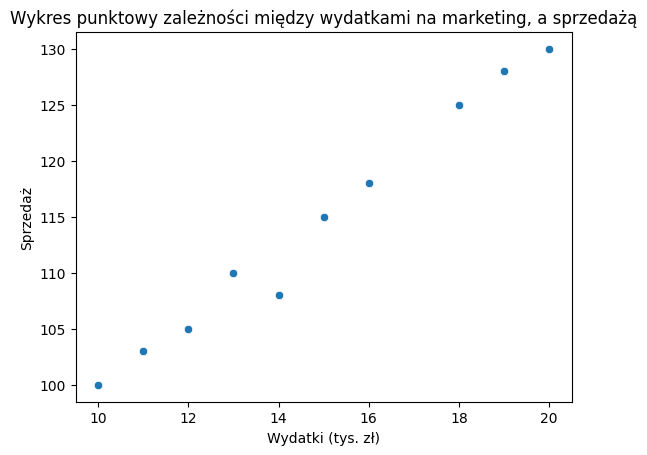

In [146]:
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats


ad_spend = np.array([10, 12, 15, 11, 13, 18, 20, 14, 16, 19])
sales = np.array([100, 105, 115, 103, 110, 125, 130, 108, 118, 128])

#Utworzenie DataFrame do załadowania danych z tablic jako wykres punktowy
data = pd.DataFrame({'Wydatki': ad_spend, 'Sprzedaz': sales})
print(data)

#Wykres punktowy - scatter plot
sns.scatterplot(x=data['Wydatki'], y=data['Sprzedaz'])
plt.title("Wykres punktowy zależności między wydatkami na marketing, a sprzedażą")
plt.xlabel("Wydatki (tys. zł)")
plt.ylabel("Sprzedaż")

#Obliczneie współczynnika korelacji Pearsona
wspolczynnik_korelacji, p_value = scipy.stats.pearsonr(ad_spend, sales)
print(f"\nWspółczynnik korelacji Pearsona: {wspolczynnik_korelacji}")
print(f"p-value: {p_value}")


if wspolczynnik_korelacji < 0.3:
    print(f"\nWspółczynnik wynosi {wspolczynnik_korelacji:.2f} i wskazuje na słabą korelację między wydatkami na marketing, a sprzedażą. Oznacza to że brak jest statystycznie istotnych dowodów na to, że inwestycja w reklamę przynosi oczekiwany skutek.")
elif wspolczynnik_korelacji < 0.7:
    print(f"\nWspółczynnik wynosi {wspolczynnik_korelacji:.2f} i wskazuje na umiarkowaną korelację między zwiększonymi wydatkami na reklamę, a sprzedażą.")
else:
    print(f"\nWspółczynnik wynosi {wspolczynnik_korelacji:.2f} i wskazuje na wysoką korelację wydatków na reklamę i sprzedaży. Istnieją statystycznie istotne dowody, że firma powinna kontynuować inwestycje w marketing celem zwiększenia sprzedaży.")

    
alpha = 0.05
#H0: Istnieją statystystycznie istotne dowody na brak korelacji między wynikami sprzedaży, a nakładami na reklamę
#H1: Korelacja między wynikami sprzedaży, a inwestycją poczynioną na reklamę wystęþuje

print(f"\nDecyzja dla poziomu istotności alpha = {alpha} (Na podstawie współczynnika korelacji Pearsona).")
if p_value < alpha:    
    print(f"p-value < alpha: Odrzucamy Hipotezę Zerową (H0). Korelacja między sprzedażą, a nakładami na reklamę jest na istotnym poziomie")
else:
    print(f"p-value >= alpha: Brak istotnych statystycznie dowodów do odrzucenia Hipotezy Zerowej (H0). Istnieją podstawy do negacji zależności między wydatkiem na reklamę,  a sprzedażą.")

Współczynnik nachylenia (slope): 3.110
Wyraz wolny (intercept): 68.174
Wartość R-kwadrat (R-squared): 0.991
Wartość p-value: 0.000


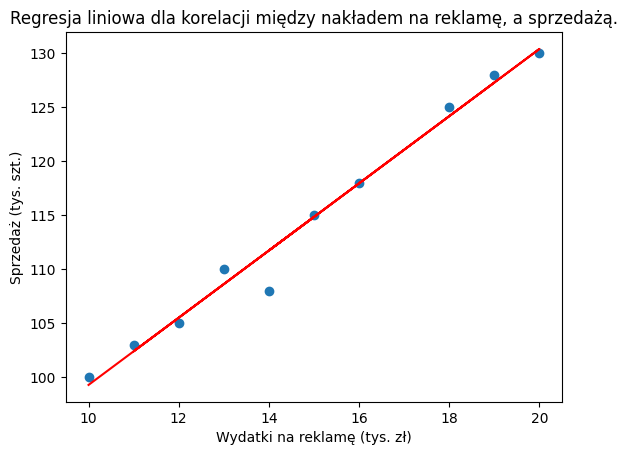

In [182]:
import statsmodels.api as sm 
import pandas as pd
import seaborn as sns
from scipy import stats

#Utworzenie tablic
ad_spend = np.array([10, 12, 15, 11, 13, 18, 20, 14, 16, 19])
sales = np.array([100, 105, 115, 103, 110, 125, 130, 108, 118, 128])
#df = pd.DataFrame({'Wydatki_na_reklame': ad_spend, 'Sprzedaz': sales})

#Utworzenie modelu regresji liniowej
model = scipy.stats.linregress(ad_spend,sales)
#Wydrukowanie wartości z zaokrągleniem do 3 miejsca po przecinku
print(f"Współczynnik nachylenia (slope): {model.slope:.3f}")
print(f"Wyraz wolny (intercept): {model.intercept:.3f}")
print(f"Wartość R-kwadrat (R-squared): {model.rvalue:.3f}")
print(f"Wartość p-value: {model.pvalue:.3f}")

"""
X=pd.DataFrame({'Wydatki_na_reklame': ad_spend})
Y=pd.DataFrame({'Sprzedaz': sales})

model = sm.OLS(X,Y)
results = model.fit()
print(results.summary())

sns.regplot(x = df['Wydatki_na_reklame'],y = df['Sprzedaz'])
"""
#Utworzenie wykresu punktowego na podstawie danych w tablicach
plt.scatter(ad_spend,sales)
#plt.scatter(df['Wydatki_na_reklame'],df['Sprzedaz'])
#Nałożenie na wykres linii regresji liniowej
plt.plot(ad_spend, model.intercept + model.slope*ad_spend, 'r')
#Zmiana opisu tabeli
plt.title("Regresja liniowa dla korelacji między nakładem na reklamę, a sprzedażą.")
plt.xlabel('Wydatki na reklamę (tys. zł)')
plt.ylabel('Sprzedaż (tys. szt.)')
plt.show()




Współczynnik nachylenia (slope): wskazuje na wzrost sprzedaży o około 3,110 tys. szt. przy zainwestowaniu 1 tys. zł.
Wartość R-kwadrat (R-squared): obrazuje jak silne jest powiązanie między wydatkiem na reklamę, a rosnącą sprzedażą. Około 99.1% zmienności sprzedaży jest wyjaśnione przez zmienność wydatków na reklamę.
P-value jest równe 0, co pozwala odrzucić H0 dla alpha o istotności 0.05. Istnieją statystycznie istotne dowody na powiązanie między wydatkami na reklamę, a wzrostem sprzedaży. Zasadne jest przyjąć, że firma powinna zwiększać nakłady finansowe na reklamę jeśli zależy jej na wyższych wynikach sprzedaży.  